<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/Pronostico_jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos de https://app.powerbi.com/view?r=eyJrIjoiYTZhZThmZDEtMjgwMS00NDdjLWI0YjItNTM0MTU1M2ExZWJlIiwidCI6IjVlMmM0OTc3LTEwN2QtNDBhMy04YWY3LTcwMDc0ODFhNjBkNCIsImMiOjR9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path1 = "/content/catalogo_R13B_1322_BM.csv"
path2 = "/content/catalogo_R13B_1321_BM.csv" #orden de prestacion
path3 = '/content/catalogo_instituciones_BM.csv'#catalogo instituciones
path4 = "/content/040_R13B_1321.csv" #all data


In [3]:
df_prestacion = pd.read_csv(path2, encoding= 'latin-1')
df_instituciones = pd.read_csv(path3, encoding= 'latin-1')
data = pd.read_csv(path4)

In [4]:
data.head(3)

,sector,periodo,institucion,orden_presentacion,concepto,importe_pesos
0,40,202308,40002,10,100000000000,1.439110e+12
1,40,202308,40002,20,100200001001,7.728244e+10
2,40,202308,40002,30,100400001001,9.745962e+08


In [5]:
df_instituciones.rename(columns={"claveinstitucion" : "institucion"}, inplace=True
                        )
df_instituciones = df_instituciones.loc[:,["nombreinstitucion", "institucion"]]
df_instituciones.head()

,nombreinstitucion,institucion
0,Banamex,40002
1,BBVA México,40012
2,Santander,40014
3,HSBC,40021
4,Inbursa,40036


In [6]:
df_prestacion.head()

,concepto,descripcion,descripcion_identada,orden
0,100000000000,ACTIVO,ACTIVO,10
1,100200001001,Efectivo y equivalentes de efectivo,Efectivo y equivalentes de efectivo,20
2,100400001001,Cuentas de margen (instrumentos financieros de...,Cuentas de margen (instrumentos financieros d...,30
3,100600001001,Inversiones en instrumentos financieros,Inversiones en instrumentos financieros,40
4,100600102001,Instrumentos financieros negociables,Instrumentos financieros negociables,50


In [7]:
prestaciones = df_prestacion.query("descripcion in ['Créditos a la vivienda' ,'Créditos de consumo', 'Inversiones en instrumentos financieros']").iloc[:3,:]
prestaciones.rename(columns={"descripcion": 'nombre_concepto'}, inplace=True)
prestaciones = prestaciones.iloc[:,:2]
prestaciones

,concepto,nombre_concepto
3,100600001001,Inversiones en instrumentos financieros
20,101800105002,Créditos de consumo
21,101800105003,Créditos a la vivienda


In [8]:
print(list(df_prestacion.descripcion.unique()).sort()) #'Créditos a la vivienda' ,'Créditos de consumo', 'Inversiones en instrumentos financieros'

None


In [9]:
list(df_prestacion.descripcion_identada.unique())

['ACTIVO',
 ' Efectivo y equivalentes de efectivo',
 ' Cuentas de margen (instrumentos financieros derivados)',
 ' Inversiones en instrumentos financieros',
 '  Instrumentos financieros negociables',
 '  Instrumentos financieros para cobrar o vender',
 '  Instrumentos financieros para cobrar principal e interés (valores)(neto)',
 '   Instrumentos financieros para cobrar principal e interés (valores)',
 '   Estimación de pérdidas crediticias esperadas para inversiones en instrumentos financieros para cobrar principal e interés (valores)',
 ' Deudores por reporto',
 ' Préstamo de valores',
 ' Instrumentos financieros derivados',
 '  Con fines de negociación',
 '  Con fines de cobertura',
 ' Ajustes de valuación por cobertura de activos financieros',
 '    Cartera de crédito con riesgo de crédito etapa 1',
 '     Créditos comerciales',
 '      Actividad empresarial o comercial',
 '      Entidades financieras',
 '      Entidades gubernamentales',
 '     Créditos de consumo',
 '     Crédito

In [10]:
list(df_prestacion.descripcion.unique())

['ACTIVO',
 'Efectivo y equivalentes de efectivo',
 'Cuentas de margen (instrumentos financieros derivados)',
 'Inversiones en instrumentos financieros',
 'Instrumentos financieros negociables',
 'Instrumentos financieros para cobrar o vender',
 'Instrumentos financieros para cobrar principal e interés (valores)(neto)',
 'Instrumentos financieros para cobrar principal e interés (valores)',
 'Estimación de pérdidas crediticias esperadas para inversiones en instrumentos financieros para cobrar principal e interés (valores)',
 'Deudores por reporto',
 'Préstamo de valores',
 'Instrumentos financieros derivados',
 'Con fines de negociación',
 'Con fines de cobertura',
 'Ajustes de valuación por cobertura de activos financieros',
 'Cartera de crédito con riesgo de crédito etapa 1',
 'Créditos comerciales',
 'Actividad empresarial o comercial',
 'Entidades financieras',
 'Entidades gubernamentales',
 'Créditos de consumo',
 'Créditos a la vivienda',
 'Media y residencial',
 'De interés socia

In [11]:
data = data.merge(df_instituciones, on = 'institucion', how='left')
data.head

<bound method NDFrame.head of         sector  periodo  institucion  orden_presentacion      concepto  \
0           40   202308        40002                  10  100000000000   
1           40   202308        40002                  20  100200001001   
2           40   202308        40002                  30  100400001001   
3           40   202308        40002                  40  100600001001   
4           40   202308        40002                  50  100600102001   
...        ...      ...          ...                 ...           ...   
178143      40   202201            5                1710  701200001001   
178144      40   202201            5                1720  701400001001   
178145      40   202201            5                1730  701600001001   
178146      40   202201            5                1740  701800001001   
178147      40   202201            5                1750  702000001001   

        importe_pesos     nombreinstitucion  
0        1.439110e+12              

In [12]:
data1 = data.merge(prestaciones, on = 'concepto', how='right' )
data1 = data1.loc[:, ["periodo", "nombreinstitucion","nombre_concepto","importe_pesos"]]
data1

,periodo,nombreinstitucion,nombre_concepto,importe_pesos
0,202308,Banamex,Inversiones en instrumentos financieros,5.489667e+11
1,202308,BBVA México,Inversiones en instrumentos financieros,6.487591e+11
2,202308,Santander,Inversiones en instrumentos financieros,4.878905e+11
3,202308,HSBC,Inversiones en instrumentos financieros,1.362613e+11
4,202308,Banco del Bajío,Inversiones en instrumentos financieros,1.165810e+10
...,...,...,...,...
3049,202201,Bank of China,Créditos a la vivienda,0.000000e+00
3050,202201,Banco S3,Créditos a la vivienda,0.000000e+00
3051,202201,KEB Hana México,Créditos a la vivienda,0.000000e+00
3052,202201,BNP Paribas México,Créditos a la vivienda,0.000000e+00


In [13]:
data1['date'] = data1.loc[:,"periodo"].astype('str').str[:4] + "-" +data1.loc[:,"periodo"].astype('str').str[4:]
data1['date'] = pd.to_datetime(data1['date'])
data1

,periodo,nombreinstitucion,nombre_concepto,importe_pesos,date
0,202308,Banamex,Inversiones en instrumentos financieros,5.489667e+11,2023-08-01
1,202308,BBVA México,Inversiones en instrumentos financieros,6.487591e+11,2023-08-01
2,202308,Santander,Inversiones en instrumentos financieros,4.878905e+11,2023-08-01
3,202308,HSBC,Inversiones en instrumentos financieros,1.362613e+11,2023-08-01
4,202308,Banco del Bajío,Inversiones en instrumentos financieros,1.165810e+10,2023-08-01
...,...,...,...,...,...
3049,202201,Bank of China,Créditos a la vivienda,0.000000e+00,2022-01-01
3050,202201,Banco S3,Créditos a la vivienda,0.000000e+00,2022-01-01
3051,202201,KEB Hana México,Créditos a la vivienda,0.000000e+00,2022-01-01
3052,202201,BNP Paribas México,Créditos a la vivienda,0.000000e+00,2022-01-01


In [2]:
top5 = ['BBVA México', 'Banamex','Banorte', 'Santander','Scotiabank']

In [15]:
data1 = data1.query("nombreinstitucion in @top5")
data1

,periodo,nombreinstitucion,nombre_concepto,importe_pesos,date
0,202308,Banamex,Inversiones en instrumentos financieros,5.489667e+11,2023-08-01
1,202308,BBVA México,Inversiones en instrumentos financieros,6.487591e+11,2023-08-01
2,202308,Santander,Inversiones en instrumentos financieros,4.878905e+11,2023-08-01
7,202308,Scotiabank,Inversiones en instrumentos financieros,1.472019e+11,2023-08-01
12,202308,Banorte,Inversiones en instrumentos financieros,3.435682e+11,2023-08-01
...,...,...,...,...,...
3003,202201,Banamex,Créditos a la vivienda,6.817019e+10,2022-01-01
3004,202201,BBVA México,Créditos a la vivienda,2.666108e+11,2022-01-01
3005,202201,Santander,Créditos a la vivienda,1.786582e+11,2022-01-01
3010,202201,Scotiabank,Créditos a la vivienda,1.634989e+11,2022-01-01


In [16]:
data1.groupby("nombreinstitucion").sum()

<ipython-input-16-3df123e38214>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1.groupby("nombreinstitucion").sum()


,periodo,importe_pesos
nombreinstitucion,,
BBVA México,12134742,2.352411e+13
Banamex,12134742,1.552201e+13
Banorte,12134742,1.302638e+13
Santander,12134742,1.619382e+13
Scotiabank,12134742,7.115089e+12


In [18]:
data1.query("nombreinstitucion == 'Banamex' & nombre_concepto =='Créditos a la vivienda'")#.shape

,periodo,nombreinstitucion,nombre_concepto,importe_pesos,date
2036,202308,Banamex,Créditos a la vivienda,6.613272e+10,2023-08-01
2086,202307,Banamex,Créditos a la vivienda,6.767578e+10,2023-07-01
2136,202306,Banamex,Créditos a la vivienda,6.730747e+10,2023-06-01
2187,202305,Banamex,Créditos a la vivienda,6.721524e+10,2023-05-01
2238,202304,Banamex,Créditos a la vivienda,6.666518e+10,2023-04-01
2289,202303,Banamex,Créditos a la vivienda,6.702529e+10,2023-03-01
2340,202302,Banamex,Créditos a la vivienda,6.637632e+10,2023-02-01
2391,202301,Banamex,Créditos a la vivienda,6.661082e+10,2023-01-01
2442,202212,Banamex,Créditos a la vivienda,6.573274e+10,2022-12-01
2493,202211,Banamex,Créditos a la vivienda,6.572845e+10,2022-11-01


In [20]:
# data1.to_csv('data_pronosticos_jerarquico.csv')

In [3]:
top5

['BBVA México', 'Banamex', 'Banorte', 'Santander', 'Scotiabank']

In [4]:
sufi = ['_consumo', '_inv', '_vivienda']

['obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'obs',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast',
 'fcast']

In [34]:
from dateutil import relativedelta

# Function to convert the decimal representation to a datetime
def convert_decimal_to_datetime(decimal):
    year = int(decimal)
    month = int((decimal - year) * 12) + 1  # Adding 1 to make it a valid month (1-12)
    return f"{year}-{month:02d}-01"  # Format as "YYYY-MM-01"

In [ ]:
data_lst = []
for bank in top5:
  for su in sufi:
    path1 = '/content/'+bank+su+'.csv'
    dfn = pd.read_csv(path1)
    dfn['banco'] = bank
    dfn['tipoconsumo'] = su[1:]
    dfn['tipo'] = ['obs']*20 + ['fcast']*30
    # Apply the conversion function to the entire column
    dfn['date_column'] = dfn['Time'].apply(convert_decimal_to_datetime)

    # Convert the resulting strings to datetime objects
    dfn['date_column'] = pd.to_datetime(dfn['date_column'])

    data_lst.append(dfn)
    print(dfn.shape)
    display(dfn.head(1))

In [36]:
data = pd.concat(data_lst).reset_index(drop=True)
data

,Time,Value,banco,tipoconsumo,tipo,date_column
0,2022.000000,2.968921e+11,BBVA México,consumo,obs,2022-01-01
1,2022.083333,2.978748e+11,BBVA México,consumo,obs,2022-01-01
2,2022.166667,3.027328e+11,BBVA México,consumo,obs,2022-03-01
3,2022.250000,3.076906e+11,BBVA México,consumo,obs,2022-04-01
4,2022.333333,3.133267e+11,BBVA México,consumo,obs,2022-04-01
...,...,...,...,...,...,...
745,2025.750000,2.673391e+11,Scotiabank,vivienda,fcast,2025-10-01
746,2025.833333,2.709802e+11,Scotiabank,vivienda,fcast,2025-10-01
747,2025.916667,2.752826e+11,Scotiabank,vivienda,fcast,2025-12-01
748,2026.000000,2.773586e+11,Scotiabank,vivienda,fcast,2026-01-01


In [39]:
sufi1 = ['consumo', 'vivienda', 'inv']

In [40]:
top5

['BBVA México', 'Banamex', 'Banorte', 'Santander', 'Scotiabank']

In [41]:
bbva_con = data.query("banco == @top5[0] & tipoconsumo == @sufi1[0]")
bbva_viv = data.query("banco == @top5[0] & tipoconsumo == @sufi1[1]")
bbva_inv = data.query("banco == @top5[0] & tipoconsumo == @sufi1[2]")
banamex_con = data.query("banco == @top5[1] & tipoconsumo == @sufi1[0]")
banamex_viv = data.query("banco == @top5[1] & tipoconsumo == @sufi1[1]")
banamex_inv = data.query("banco == @top5[1] & tipoconsumo == @sufi1[2]")
banorte_con = data.query("banco == @top5[2] & tipoconsumo == @sufi1[0]")
banorte_viv = data.query("banco == @top5[2] & tipoconsumo == @sufi1[1]")
banorte_inv = data.query("banco == @top5[2] & tipoconsumo == @sufi1[2]")
santander_con = data.query("banco == @top5[3] & tipoconsumo == @sufi1[0]")
santander_viv = data.query("banco == @top5[3] & tipoconsumo == @sufi1[1]")
santander_inv = data.query("banco == @top5[3] & tipoconsumo == @sufi1[2]")
scotia_con = data.query("banco == @top5[4] & tipoconsumo == @sufi1[0]")
scotia_viv = data.query("banco == @top5[4] & tipoconsumo == @sufi1[1]")
scotia_inv = data.query("banco == @top5[4] & tipoconsumo == @sufi1[2]")

In [52]:
vivienda_nacional = pd.DataFrame()
vivienda_nacional['Value'] = bbva_viv.Value.values + banamex_viv.Value.values  + banorte_viv.Value.values  +santander_viv.Value.values  + scotia_viv.Value.values
vivienda_nacional['date_column'] = bbva_viv.date_column.values

consumo_nacional = pd.DataFrame()
consumo_nacional['Value'] = bbva_con.Value.values + banamex_con.Value.values  + banorte_con.Value.values  +santander_con.Value.values  + scotia_con.Value.values
consumo_nacional['date_column'] = bbva_con.date_column.values

inversion_nacional = pd.DataFrame()
inversion_nacional['Value'] = bbva_inv.Value.values + banamex_inv.Value.values  + banorte_inv.Value.values  +santander_inv.Value.values  + scotia_inv.Value.values
inversion_nacional['date_column'] = bbva_inv.date_column.values

display(vivienda_nacional.head())
display(consumo_nacional.head())
display(inversion_nacional.head())

,Value,date_column
0,8.738738e+11,2022-01-01
1,8.776861e+11,2022-01-01
2,8.865378e+11,2022-03-01
3,8.925757e+11,2022-04-01
4,9.007665e+11,2022-04-01


,Value,date_column
0,7.239202e+11,2022-01-01
1,7.260521e+11,2022-01-01
2,7.329386e+11,2022-03-01
3,7.433984e+11,2022-04-01
4,7.551969e+11,2022-04-01


,Value,date_column
0,1.995290e+12,2022-01-01
1,1.936658e+12,2022-01-01
2,1.957532e+12,2022-03-01
3,1.946749e+12,2022-04-01
4,1.970278e+12,2022-04-01


In [54]:
s = np.matrix([[1,1,1,1,1],
              [1,0,0,0,0],
              [0,1,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1]])
s

matrix([[1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [84]:
s1 = s.T * np.linalg.inv(s*s.T) * s
s1 # 5x5

matrix([[ 0.5, -0.5,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ,  0.5,  0. ],
        [ 0. ,  0. ,  1. , -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  1. ]])

In [105]:
vivienda =vivienda_nacional.copy()
vivienda['bbva'] = bbva_viv.Value.values
vivienda['banamex'] = banamex_viv.Value.values
vivienda['banorte'] =  banorte_viv.Value.values
vivienda['santander'] = santander_viv.Value.values
vivienda['scotia'] =scotia_viv.Value .values
vivienda['tipo']= bbva_viv.tipo.values
print(vivienda.shape)
display(vivienda.tail())

sample_val = np.matrix( vivienda.loc[20:, ['bbva','banamex',	'banorte',	'santander',	'scotia']].values)
sample_val.shape #30x5
y_jerarquica = s1*sample_val.T
y_jerarquica =y_jerarquica.T
y_jerarquica_df = pd.DataFrame(y_jerarquica, columns= ['bbva','banamex',	'banorte',	'santander',	'scotia'] )
y_jerarquica_df['Value'] = y_jerarquica_df.sum(axis =1 )
y_jerarquica_df['tipo'] = 'fcast_hierarquical'
y_jerarquica_df['date_column'] = vivienda.query("tipo == 'fcast'").date_column.reset_index(drop=True)

print(y_jerarquica_df.shape)
display(y_jerarquica_df.head())


df2 = pd.concat([vivienda.query("tipo == 'obs'"), y_jerarquica_df], axis =0 )
df2.to_csv('vivienda_fcast_hierarquical.csv')

vivienda.to_csv('vivienda_fcast_normal.csv')

(50, 8)


,Value,date_column,bbva,banamex,banorte,santander,scotia,tipo
45,1.177007e+12,2025-10-01,3.564842e+11,6.851160e+10,2.658284e+11,2.188433e+11,2.673391e+11,fcast
46,1.183725e+12,2025-10-01,3.584194e+11,6.917841e+10,2.650288e+11,2.201185e+11,2.709802e+11,fcast
47,1.192273e+12,2025-12-01,3.607344e+11,6.918270e+10,2.650265e+11,2.220467e+11,2.752826e+11,fcast
48,1.194159e+12,2026-01-01,3.620173e+11,7.006078e+10,2.628102e+11,2.219125e+11,2.773586e+11,fcast
49,1.197344e+12,2026-01-01,3.640574e+11,6.982627e+10,2.616550e+11,2.220990e+11,2.797066e+11,fcast


In [150]:
consumo =consumo_nacional.copy()
consumo['bbva'] = bbva_con.Value.values
consumo['banamex'] = banamex_con.Value.values
consumo['banorte'] =  banorte_con.Value.values
consumo['santander'] = santander_con.Value.values
consumo['scotia'] =scotia_con.Value .values
consumo['tipo']= bbva_con.tipo.values
print(consumo.shape)
display(consumo.tail())

sample_val = np.matrix( consumo.loc[20:, ['bbva','banamex',	'banorte',	'santander',	'scotia']].values)
sample_val.shape #30x5
y_jerarquica = s1*sample_val.T
y_jerarquica =y_jerarquica.T
y_jerarquica_df = pd.DataFrame(y_jerarquica, columns= ['bbva','banamex',	'banorte',	'santander',	'scotia'] )
y_jerarquica_df['Value'] = y_jerarquica_df.sum(axis =1 )
y_jerarquica_df['tipo'] = 'fcast_hierarquical'
y_jerarquica_df['date_column'] = consumo.query("tipo == 'fcast'").date_column.reset_index(drop=True)

print(y_jerarquica_df.shape)
display(y_jerarquica_df.head())


df2 = pd.concat([consumo.query("tipo == 'obs'"), y_jerarquica_df], axis =0 )

df2.to_csv('consumo_fcast_hierarquical.csv')
consumo.to_csv('consumo_fcast_normal.csv')

(50, 8)


,Value,date_column,bbva,banamex,banorte,santander,scotia,tipo
45,1.221740e+12,2025-10-01,5.133554e+11,2.231940e+11,2.219722e+11,2.300362e+11,3.318198e+10,fcast
46,1.253814e+12,2025-10-01,5.263608e+11,2.329083e+11,2.257299e+11,2.354261e+11,3.338889e+10,fcast
47,1.249569e+12,2025-12-01,5.241690e+11,2.314630e+11,2.256621e+11,2.354056e+11,3.286988e+10,fcast
48,1.258195e+12,2026-01-01,5.286401e+11,2.318034e+11,2.280748e+11,2.368495e+11,3.282758e+10,fcast
49,1.265745e+12,2026-01-01,5.306335e+11,2.327516e+11,2.298213e+11,2.397749e+11,3.276360e+10,fcast


(30, 8)


,bbva,banamex,banorte,santander,scotia,Value,tipo,date_column
0,1.045306e+11,2.639029e+11,6.496087e+10,1.652672e+11,3.306396e+10,6.317256e+11,fcast_hierarquical,2023-09-01
1,1.059799e+11,2.669516e+11,6.601698e+10,1.677098e+11,3.301014e+10,6.396683e+11,fcast_hierarquical,2023-10-01
2,1.076254e+11,2.793609e+11,6.697836e+10,1.730997e+11,3.321706e+10,6.602814e+11,fcast_hierarquical,2023-10-01
3,1.072521e+11,2.779053e+11,6.718187e+10,1.730791e+11,3.269804e+10,6.581165e+11,fcast_hierarquical,2023-12-01
4,1.093175e+11,2.789676e+11,6.889489e+10,1.745231e+11,3.265575e+10,6.643589e+11,fcast_hierarquical,2024-01-01


In [154]:
inversion =inversion_nacional.copy()
inversion['bbva'] = bbva_inv.Value.values
inversion['banamex'] = banamex_inv.Value.values
inversion['banorte'] =  banorte_inv.Value.values
inversion['santander'] = santander_inv.Value.values
inversion['scotia'] =scotia_inv.Value .values
inversion['tipo']= bbva_inv.tipo.values
print(inversion.shape)
display(inversion.tail())

sample_val = np.matrix( inversion.loc[20:, ['bbva','banamex',	'banorte',	'santander',	'scotia']].values)
sample_val.shape #30x5
y_jerarquica = s1*sample_val.T
y_jerarquica =y_jerarquica.T
y_jerarquica_df = pd.DataFrame(y_jerarquica, columns= ['bbva','banamex',	'banorte',	'santander',	'scotia'] )
y_jerarquica_df['Value'] = y_jerarquica_df.sum(axis =1 )
y_jerarquica_df['tipo'] = 'fcast_hierarquical'
y_jerarquica_df['date_column'] = inversion.query("tipo == 'fcast'").date_column.reset_index(drop=True)

print(y_jerarquica_df.shape)
display(y_jerarquica_df.head())


df2 = pd.concat([inversion.query("tipo == 'obs'"), y_jerarquica_df], axis =0 )

df2.to_csv('inversion_fcast_hierarquical.csv')
inversion.to_csv('inversion_fcast_normal.csv')

(50, 8)


,Value,date_column,bbva,banamex,banorte,santander,scotia,tipo
45,2.568112e+12,2025-10-01,9.019218e+11,4.525403e+11,5.680257e+11,4.904595e+11,1.551644e+11,fcast
46,2.564537e+12,2025-10-01,8.980163e+11,4.398092e+11,5.820176e+11,4.884113e+11,1.562829e+11,fcast
47,2.544985e+12,2025-12-01,8.959840e+11,4.046696e+11,5.763810e+11,5.232849e+11,1.446653e+11,fcast
48,2.556388e+12,2026-01-01,8.872842e+11,4.170674e+11,5.693712e+11,5.155263e+11,1.671394e+11,fcast
49,2.562573e+12,2026-01-01,8.950459e+11,4.002001e+11,5.617268e+11,5.329216e+11,1.726786e+11,fcast


(30, 8)


,bbva,banamex,banorte,santander,scotia,Value,tipo,date_column
0,5.959930e+10,7.392625e+11,1.038728e+11,4.501936e+11,1.487015e+11,1.501630e+12,fcast_hierarquical,2023-09-01
1,6.693284e+10,7.543610e+11,1.092192e+11,4.555455e+11,1.435680e+11,1.529627e+12,fcast_hierarquical,2023-10-01
2,7.134562e+10,7.406059e+11,1.236759e+11,4.534973e+11,1.446865e+11,1.533811e+12,fcast_hierarquical,2023-10-01
3,8.789923e+10,7.229031e+11,1.064113e+11,4.883710e+11,1.330689e+11,1.538653e+12,fcast_hierarquical,2023-12-01
4,7.735042e+10,7.314216e+11,9.204375e+10,4.806124e+11,1.555430e+11,1.536971e+12,fcast_hierarquical,2024-01-01


In [153]:
df2

,Value,date_column,bbva,banamex,banorte,santander,scotia,tipo
0,1.995290e+12,2022-01-01,5.618641e+11,5.605184e+11,2.357007e+11,5.117842e+11,1.254221e+11,obs
1,1.936658e+12,2022-01-01,5.516647e+11,5.379872e+11,2.317624e+11,4.958320e+11,1.194122e+11,obs
2,1.957532e+12,2022-03-01,5.433537e+11,5.670382e+11,2.373078e+11,4.969175e+11,1.129147e+11,obs
3,1.946749e+12,2022-04-01,5.188348e+11,5.818366e+11,2.388571e+11,4.772057e+11,1.300149e+11,obs
4,1.970278e+12,2022-04-01,5.390640e+11,5.721476e+11,2.473053e+11,4.808938e+11,1.308677e+11,obs
5,1.943844e+12,2022-06-01,5.285657e+11,5.433829e+11,2.498544e+11,4.811243e+11,1.409170e+11,obs
6,1.942942e+12,2022-07-01,5.136263e+11,5.526120e+11,2.514396e+11,4.852000e+11,1.400641e+11,obs
7,1.969725e+12,2022-07-01,5.280251e+11,5.743707e+11,2.554924e+11,4.704336e+11,1.414037e+11,obs
8,1.963155e+12,2022-09-01,5.126303e+11,5.511897e+11,3.236955e+11,4.327367e+11,1.429033e+11,obs
9,2.008342e+12,2022-10-01,5.397200e+11,5.636122e+11,3.291511e+11,4.380885e+11,1.377697e+11,obs


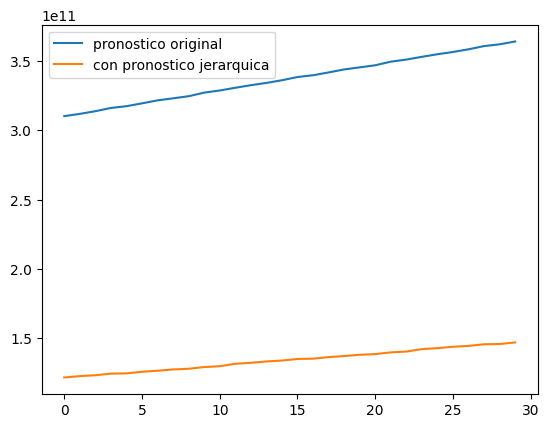

In [123]:
jear= y_jerarquica_df.iloc[:,0]
original = sample_val[:,0]
plt.plot(range(0,30), original, label = 'pronostico original')
plt.plot(range(0,30), jear, label ='con pronostico jerarquica')
plt.legend()

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [158]:
pathconjer = "/content/consumo_fcast_hierarquical.csv"
pathconnor ="/content/consumo_fcast_normal.csv"
pathvivjer = "/content/vivienda_fcast_hierarquical.csv"
pathvivnor = "/content/vivienda_fcast_normal.csv"
pathinvjer = "/content/inversion_fcast_hierarquical.csv"
pathinvnor ="/content/inversion_fcast_normal.csv"

In [160]:
con_jer = pd.read_csv(pathconjer)
con_nor = pd.read_csv(pathconnor)
viv_jer = pd.read_csv(pathvivjer)
viv_nor = pd.read_csv(pathvivnor)
inv_jer = pd.read_csv(pathinvjer)
inv_nor = pd.read_csv(pathinvnor)


In [170]:
for df in [con_jer, con_nor, viv_jer, viv_nor, inv_jer, inv_nor]:

  df.drop(columns=["Unnamed: 0"], inplace=True)

In [188]:
df1 = inv_nor.merge(inv_jer, on = ["date_column"], suffixes = ['_normal', '_jerarquico'])
df1.head(10)

,Value_normal,date_column,bbva_normal,banamex_normal,banorte_normal,santander_normal,scotia_normal,tipo_normal,Value_jerarquico,bbva_jerarquico,banamex_jerarquico,banorte_jerarquico,santander_jerarquico,scotia_jerarquico,tipo_jerarquico
0,1.995290e+12,2022-01-01,5.618641e+11,5.605184e+11,2.357007e+11,5.117842e+11,1.254221e+11,obs,1.995290e+12,5.618641e+11,5.605184e+11,2.357007e+11,5.117842e+11,1.254221e+11,obs
1,1.995290e+12,2022-01-01,5.618641e+11,5.605184e+11,2.357007e+11,5.117842e+11,1.254221e+11,obs,1.936658e+12,5.516647e+11,5.379872e+11,2.317624e+11,4.958320e+11,1.194122e+11,obs
2,1.936658e+12,2022-01-01,5.516647e+11,5.379872e+11,2.317624e+11,4.958320e+11,1.194122e+11,obs,1.995290e+12,5.618641e+11,5.605184e+11,2.357007e+11,5.117842e+11,1.254221e+11,obs
3,1.936658e+12,2022-01-01,5.516647e+11,5.379872e+11,2.317624e+11,4.958320e+11,1.194122e+11,obs,1.936658e+12,5.516647e+11,5.379872e+11,2.317624e+11,4.958320e+11,1.194122e+11,obs
4,1.957532e+12,2022-03-01,5.433537e+11,5.670382e+11,2.373078e+11,4.969175e+11,1.129147e+11,obs,1.957532e+12,5.433537e+11,5.670382e+11,2.373078e+11,4.969175e+11,1.129147e+11,obs
5,1.946749e+12,2022-04-01,5.188348e+11,5.818366e+11,2.388571e+11,4.772057e+11,1.300149e+11,obs,1.946749e+12,5.188348e+11,5.818366e+11,2.388571e+11,4.772057e+11,1.300149e+11,obs
6,1.946749e+12,2022-04-01,5.188348e+11,5.818366e+11,2.388571e+11,4.772057e+11,1.300149e+11,obs,1.970278e+12,5.390640e+11,5.721476e+11,2.473053e+11,4.808938e+11,1.308677e+11,obs
7,1.970278e+12,2022-04-01,5.390640e+11,5.721476e+11,2.473053e+11,4.808938e+11,1.308677e+11,obs,1.946749e+12,5.188348e+11,5.818366e+11,2.388571e+11,4.772057e+11,1.300149e+11,obs
8,1.970278e+12,2022-04-01,5.390640e+11,5.721476e+11,2.473053e+11,4.808938e+11,1.308677e+11,obs,1.970278e+12,5.390640e+11,5.721476e+11,2.473053e+11,4.808938e+11,1.308677e+11,obs
9,1.943844e+12,2022-06-01,5.285657e+11,5.433829e+11,2.498544e+11,4.811243e+11,1.409170e+11,obs,1.943844e+12,5.285657e+11,5.433829e+11,2.498544e+11,4.811243e+11,1.409170e+11,obs


In [191]:
df2 = df1.drop_duplicates(subset = 'bbva_normal')
df2.to_csv('inversion_jerarquic_2.csv')

In [190]:
df2.query("tipo_normal == 'obs'").shape

(20, 15)